# Predicting Video Game Hits

### Data exploration and cleaning / processing

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime
from pandas import Series
from math import ceil
import matplotlib.pyplot as plt

np.random.seed(1000)


pd.options.display.max_rows = 9999
pd.options.display.max_columns = 9999

In [2]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv', encoding="utf-8")
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Selecting columns to be used as features and limit results to years 2000-2015

In [3]:
usecols = ['Name','Platform','Genre', 'Developer','Year_of_Release','Critic_Score','Global_Sales','Rating','Publisher']
df1 = df[usecols]
df1 = df1.dropna().reset_index(drop=True)
df1 = df1[(df1['Year_of_Release'] >= 2000.0)]

In [4]:
platforms = df1.Platform.unique()
df1 = pd.get_dummies(df1, prefix=['x'], columns=['Platform'])

In [5]:
df1.head(5)

,Name,Genre,Developer,Year_of_Release,Critic_Score,Global_Sales,Rating,Publisher,x_3DS,x_DC,x_DS,x_GBA,x_GC,x_PC,x_PS,x_PS2,x_PS3,x_PS4,x_PSP,x_PSV,x_Wii,x_WiiU,x_X360,x_XB,x_XOne
0,Wii Sports,Sports,Nintendo,2006.0,76.0,82.53,E,Nintendo,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Mario Kart Wii,Racing,Nintendo,2008.0,82.0,35.52,E,Nintendo,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Wii Sports Resort,Sports,Nintendo,2009.0,80.0,32.77,E,Nintendo,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,New Super Mario Bros.,Platform,Nintendo,2006.0,89.0,29.80,E,Nintendo,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Wii Play,Misc,Nintendo,2006.0,58.0,28.92,E,Nintendo,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [6]:
cols = ['Name', 'Genre', 'Developer','Rating','Publisher']

In [7]:
df2 = df1.groupby(cols).agg(['count','sum','mean'])

In [8]:
dropcols = [('Year_of_Release', 'count'),('Year_of_Release', 'sum'),('Critic_Score', 'count'),('Critic_Score', 'sum')
            ,('Global_Sales','mean')]
for plat in platforms:
    dropcols.append(('x_'+plat, 'count'))
    dropcols.append(('x_'+plat, 'mean'))


In [9]:
df3 = df2.drop(dropcols, axis = 1).T.copy()

df3.reset_index(inplace=True,drop=True,col_level=0)

df4 = df3.T.reset_index(drop=False).copy()

df4.rename(columns={0: "Year", 1: "Critic_Score", 2: "Num_Platforms", 3: "Global_Sales"},inplace=True)

df4.rename(columns=dict(zip(df4.columns[9:], 'x_'+platforms)),inplace=True)

df4['Year'] = np.floor(df4['Year'])

In [10]:
df4.head()

,Name,Genre,Developer,Rating,Publisher,Year,Critic_Score,Num_Platforms,Global_Sales,x_Wii,x_DS,x_X360,x_PS3,x_PS2,x_3DS,x_PS4,x_XB,x_PC,x_PSP,x_WiiU,x_GC,x_GBA,x_XOne,x_PS,x_PSV,x_DC
0,Tales of Xillia 2,Role-Playing,Bandai Namco Games,T,Namco Bandai Games,2012.0,71.0,1.0,0.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,.hack//Infection Part 1,Role-Playing,CyberConnect2,T,Atari,2002.0,75.0,1.0,1.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,.hack//Mutation Part 2,Role-Playing,CyberConnect2,T,Atari,2002.0,76.0,1.0,0.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,.hack//Outbreak Part 3,Role-Playing,CyberConnect2,T,Atari,2002.0,70.0,1.0,0.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,007 Racing,Racing,Eutechnyx,T,Electronic Arts,2000.0,51.0,1.0,0.53,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
wordfreq = pd.Series(np.concatenate([x.split() for x in df4.Name.unique()])).value_counts()

franchises = ['World of Warcraft', 'Dragon Quest', 'FIFA', 'NBA', 'Just Dance', 'Dance Dance', 'Final Fantasy', 'Mario', 'Dynasty Warriors'
             , 'Dragon Ball', 'Sonic', 'Naruto', 'Call of Duty', 'Ninja Gaiden', 'LEGO', 'Battlefield', 'Star Wars', 'NFL', 'NCAA'
             , 'Tom Clancy', 'Marvel', 'Monster Hunter', 'Disney', 'Sims', 'MLB', 'Kingdom Hearts', 'Crash Bandicoot', 'Grand Theft Auto'
             ,'Hitman', 'Tomb Raider','Zelda','Dark Souls', 'Ace Combat', 'ATV', 'Age of Empires', 'Animal Crossing', "Assassin's Creed"
              , 'Batman', 'Castlevania', 'ESPN', 'F1', 'Forza', 'God of War', 'Guitar Hero', 'Harry Potter', 'Harvest Moon', 'Jak'
             , 'Medal of Honor', 'Mega Man', 'Metal Gear Solid', 'Mortal Kombat', 'MotoGP', 'NASCAR', 'Need for Speed', 'Prince of Persia'
             , 'SSX', 'Shin Megami Tensei', 'SoulCalibur', 'Spider-Man', 'Spyro', 'Star Trek', 'Tiger Woods', 'WWE']

f = [x.lower() for x in franchises]

In [12]:
def franchise(name):
    for s in f:
        if s in name.lower():
            return s
        
def is_franchise(name):
    if name != None:
        return 1
    else:
        return 0

def fcount(name):
    fcount = 0
    for s in f:
        if s in name.lower():
            fcount += 1
    return fcount
  
df4['Franchise'] = df4['Name'].apply(lambda x: franchise(x))

df4['is_franchise'] = df4['Franchise'].apply(lambda x: is_franchise(x))

#df4['Franchise_Count'] = df4['Name'].apply(lambda x: fcount(x))


In [13]:
def hit(sales):
    if sales >= 1:
        return 1
    else:
        return 0
    
df4['Hit'] = df4['Global_Sales'].apply(lambda x: hit(x))
df4.drop('Global_Sales', axis=1, inplace=True)

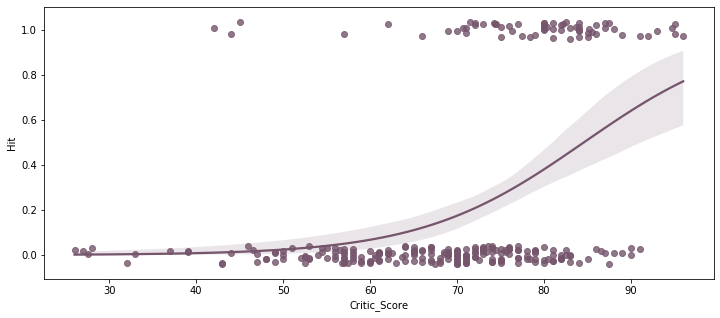

In [15]:
# Logistic regression plot with sample of the data
n = ceil(0.05 * len(df4['Hit']))
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="Critic_Score", y="Hit", data=df4.sample(n=n),
            logistic=True, n_boot=500, y_jitter=.04, color="#75556c")

In [16]:
test = df4[(df4['Critic_Score'] <= 40) & (df4['Hit'] == 1)]
test = test[['Name','Critic_Score', 'Year']].sort_values(by='Critic_Score')
test

,Name,Critic_Score,Year
985,Deal or No Deal,20.000000,2007.0
1744,Game Party,25.000000,2007.0
1745,Game Party 2,29.000000,2008.0
2194,Jillian Michaels' Fitness Ultimatum 2009,30.000000,2008.0
1693,Frogger: The Great Quest,32.000000,2001.0
603,Call of Duty Black Ops: Declassified,33.000000,2012.0
4936,The Walking Dead: Survival Instinct,33.000000,2013.0
1746,Game Party 3,37.000000,2009.0
297,Bad Boys: Miami Takedown,37.666667,2004.0
642,Carnival Games: Mini Golf,38.000000,2008.0


### Prediction model

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn import svm

Generating features

In [18]:
df_final = df4.drop(['Name'],axis=1).copy()
df_final[:5]

,Genre,Developer,Rating,Publisher,Year,Critic_Score,Num_Platforms,x_Wii,x_DS,x_X360,x_PS3,x_PS2,x_3DS,x_PS4,x_XB,x_PC,x_PSP,x_WiiU,x_GC,x_GBA,x_XOne,x_PS,x_PSV,x_DC,Franchise,is_franchise,Hit
0,Role-Playing,Bandai Namco Games,T,Namco Bandai Games,2012.0,71.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0,0
1,Role-Playing,CyberConnect2,T,Atari,2002.0,75.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0,1
2,Role-Playing,CyberConnect2,T,Atari,2002.0,76.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0,0
3,Role-Playing,CyberConnect2,T,Atari,2002.0,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0,0
4,Racing,Eutechnyx,T,Electronic Arts,2000.0,51.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0,0


In [19]:
from pandas import get_dummies
df_copy = pd.get_dummies(df_final)

In [20]:
df_copy[:5]

Year  Critic_Score  Num_Platforms  x_Wii  x_DS  x_X360  x_PS3  x_PS2  \
0  2012.0          71.0            1.0    0.0   0.0     0.0    0.0    0.0   
1  2002.0          75.0            1.0    0.0   0.0     0.0    0.0    0.0   
2  2002.0          76.0            1.0    0.0   0.0     0.0    0.0    0.0   
3  2002.0          70.0            1.0    0.0   0.0     0.0    0.0    0.0   
4  2000.0          51.0            1.0    0.0   0.0     0.0    0.0    0.0   

   x_3DS  x_PS4  x_XB  x_PC  x_PSP  x_WiiU  x_GC  x_GBA  x_XOne  x_PS  x_PSV  \
0    0.0    0.0   0.0   1.0    0.0     0.0   0.0    0.0     0.0   0.0    0.0   
1    0.0    0.0   1.0   0.0    0.0     0.0   0.0    0.0     0.0   0.0    0.0   
2    0.0    0.0   1.0   0.0    0.0     0.0   0.0    0.0     0.0   0.0    0.0   
3    0.0    0.0   1.0   0.0    0.0     0.0   0.0    0.0     0.0   0.0    0.0   
4    0.0    1.0   0.0   0.0    0.0     0.0   0.0    0.0     0.0   0.0    0.0   

   x_DC  is_franchise  Hit  Genre_Action  Genre_Adventure  Genre_Fighting  \
0   0.0             0    0             0                0               0   
1   0.0             0    1             0                0               0   
2   0.0             0    0             0                0               0   
3   0.0             0    0             0                0               0   
4   0.0             0    0             0                0               0   

   Genre_Misc  Genre_Platform  Genre_Puzzle  Genre_Racing  Genre_Role-Playing  \
0           0               0             0             0                   1   
1           0               0             0             0                   1   
2           0               0             0             0                   1   
3           0               0             0             0                   1   
4           0               0             0             1                   0   

   Genre_Shooter  Genre_Simulation  Genre_Sports  Genre_Strategy  \
0              0                 0             0               0   
1              0                 0             0               0   
2              0                 0             0               0   
3              0                 0             0               0   
4              0                 0             0               0   

   Developer_10tacle Studios  Developer_10tacle Studios, Fusionsphere Systems  \
0                          0                                                0   
1                          0                                                0   
2                          0                                                0   
3                          0                                                0   
4                          0                                                0   

   Developer_1C, 1C Company  Developer_1C, Ino-Co, 1C Company  \
0                         0                                 0   
1                         0                                 0   
2                         0                                 0   
3                         0                                 0   
4                         0                                 0   

   Developer_1C: Maddox Games  Developer_1C:Ino-Co  \
0                           0                    0   
1                           0                    0   
2                           0                    0   
3                           0                    0   
4                           0                    0   

   Developer_1st Playable Productions  Developer_2015  Developer_2D Boy  \
0                                   0               0                 0   
1                                   0               0                 0   
2                                   0               0                 0   
3                                   0               0                 0   
4                                   0               0                 0   

   Developer_2K Australia  Developer_2K Czech  D

In [21]:
df6 = df_copy[(df_copy['Year'] <= 2015.0)]
y = df6['Hit']
X = df6.drop(['Hit'],axis=1)

Testing prediction accuracy with logisitc regression and random forest classifer

In [22]:
kf = KFold(n_splits=20)
radm = RandomForestClassifier(random_state=30, max_depth=15)
log_reg = LogisticRegression()

avgRadm=[]
avgLog=[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    radm.fit(X_train, y_train)
    log_reg.fit(X_train, y_train)
    y_val_1 = radm.predict_proba(X_test)
    y_val_2 = log_reg.predict_proba(X_test)
    #auc_radm = metrics.roc_auc_score( y_test, y_val_1[:,1] )
    #auc_log = metrics.roc_auc_score( y_test, y_val_2[:,1] )

    avgRadm.append(sum(pd.DataFrame(y_val_1).idxmax(axis=1).values
                                   == y_test)/len(y_test))


    avgLog.append(sum(pd.DataFrame(y_val_2).idxmax(axis=1).values
                                   == y_test)/len(y_test))

    all_predictions = log_reg.predict(X_test)

print('Average validation accuracy -- radm', np.mean(avgRadm))
print('Average validation accuracy -- log', np.mean(avgLog))

Average validation accuracy -- radm 0.8005968379446641
Average validation accuracy -- log 0.8558471673254282


In [23]:
df_test = df_copy[(df_copy['Year'] <= 2015.0)]
y_test = df_test['Hit']
X_test = df_test.drop(['Hit'],axis=1)

In [24]:
pred_test = log_reg.predict_proba(X_test)
df_test['Hit_Probability'] = pred_test[:,1]
df_test2 = df_test[['Hit_Probability']]

In [25]:
df_probs2 = df_test2.merge(test, left_index=True, right_index=True)
df_probs2[['Name','Critic_Score', 'Hit_Probability']]

,Name,Critic_Score,Hit_Probability
297,Bad Boys: Miami Takedown,37.666667,0.064602
603,Call of Duty Black Ops: Declassified,33.000000,0.013979
642,Carnival Games: Mini Golf,38.000000,0.019122
985,Deal or No Deal,20.000000,0.003794
1204,Dragon Ball Z: Taiketsu,40.000000,0.028500
1693,Frogger: The Great Quest,32.000000,0.004006
1744,Game Party,25.000000,0.009020
1745,Game Party 2,29.000000,0.012518
1746,Game Party 3,37.000000,0.017048
2194,Jillian Michaels' Fitness Ultimatum 2009,30.000000,0.004003


In [27]:
# fig, ax = plt.subplots(figsize=(5,4))
# sns.heatmap(confusion_matrix(y_test, all_predictions), annot=True, linewidths=.5, fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
# plt.title('Training Set Confusion Matrix')

### Ranking feature performance

In [28]:
indices = np.argsort(radm.feature_importances_)[::-1]

# Print the feature ranking
print('Feature ranking (top 10):')

for f in range(10):
    print('%d. feature %d %s (%f)' % (f , indices[f], df6.columns[indices[f]],
                                      radm.feature_importances_[indices[f]]))

Feature ranking (top 10):
0. feature 1 Critic_Score (0.180300)
1. feature 11 x_PC (0.085355)
2. feature 2 Num_Platforms (0.083465)
3. feature 20 is_franchise (0.071425)
4. feature 17 x_PS (0.064140)
5. feature 1530 Publisher_Eidos Interactive (0.036991)
6. feature 0 Year (0.027567)
7. feature 12 x_PSP (0.017810)
8. feature 1780 Franchise_kingdom hearts (0.014210)
9. feature 1781 Franchise_lego (0.013884)


Which 2016 games will be hits?


In [29]:
df8 = df_copy[(df_copy['Year'] == 2016.0)]
y2 = df8['Hit']
X2 = df8.drop(['Hit'],axis=1)

In [30]:
pred = log_reg.predict_proba(X2)

In [31]:
df8['Hit_Probability'] = pred[:,1]

In [32]:
df9 = df8[['Hit_Probability']]

In [33]:
df_probs = df9.merge(df4, left_index=True, right_index=True)

In [34]:
df_probs.sort_values(['Hit_Probability'], ascending=[False], inplace=True)
df10 = df_probs[['Name', 'Hit_Probability','Hit']].copy()

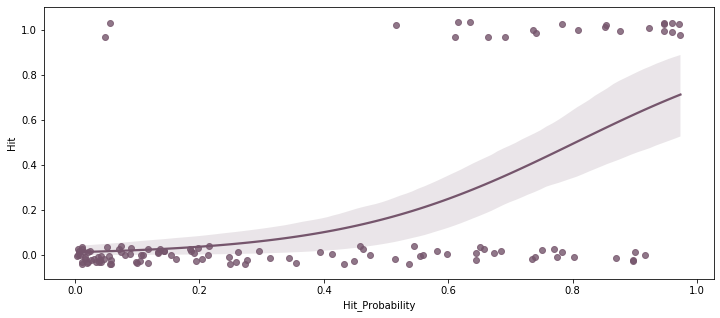

In [35]:
n = ceil(1 * len(df10['Hit']))
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="Hit_Probability", y="Hit", data=df10.sample(n=n),
            logistic=True, n_boot=500, y_jitter=.04, color="#75556c")

Top 10 games from 2016 with *highest* probability of becoming hits

In [36]:
df10[:10].reset_index(drop=True)

,Name,Hit_Probability,Hit
0,Battlefield 1,0.973319,1
1,Lego Star Wars: The Force Awakens,0.970446,1
2,Call of Duty: Infinite Warfare,0.959739,1
3,LEGO Marvel's Avengers,0.959080,1
4,Forza Horizon 3,0.947404,1
5,Titanfall 2,0.947200,1
6,Tom Clancy's The Division,0.946208,1
7,Overwatch,0.923020,1
8,Assassin's Creed The Ezio Collection,0.916150,0
9,Just Dance 2017,0.899992,0


Top 10 games from 2016 with *lowest* probability of becoming hits

In [37]:
df10[:-11:-1].reset_index(drop=True)

,Name,Hit_Probability,Hit
0,RollerCoaster Tycoon World,0.003679,0
1,Super Dungeon Bros,0.004686,0
2,Mark McMorris Infinite Air,0.004989,0
3,The Technomancer,0.006949,0
4,Aegis of Earth: Protonovus Assault,0.008137,0
5,Psycho-Pass: Mandatory Happiness,0.010857,0
6,Touhou Genso Rondo: Bullet Ballet,0.011477,0
7,Anima - Gate of Memories,0.011628,0
8,Root Letter,0.011839,0
9,Superdimension Neptune vs Sega Hard Girls,0.014279,0


Games that were hits that we predicted not to be

In [38]:
df10[(df10['Hit']==1)&(df10['Hit_Probability']<0.6)]

,Name,Hit_Probability,Hit
1330,EA Sports UFC 2,0.515275,1
3297,No Man's Sky,0.056415,1
3512,Pokken Tournament,0.047997,1


Games that weren't hits yet that we predict will be

In [39]:
df10[(df10['Hit']==0)&(df10['Hit_Probability']>0.75)]

,Name,Hit_Probability,Hit
247,Assassin's Creed The Ezio Collection,0.916150,0
2226,Just Dance 2017,0.899992,0
1085,Dishonored 2,0.897716,0
414,BioShock The Collection,0.896454,0
1218,Dragon Ball: Xenoverse 2,0.869939,0
5543,XCOM 2,0.802407,0
2635,Mario Party: Star Rush,0.782956,0
4174,Skylanders Imaginators,0.774646,0
3396,Paper Mario: Color Splash,0.770198,0
337,Batman: Return to Arkham,0.751338,0
